In [1]:
!wget https://files.grouplens.org/datasets/movielens/ml-latest-small.zip

--2023-02-21 14:40:02--  https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip’

ml-latest-small.zip 100%[===================>] 955.28K   417KB/s    in 2.3s    

2023-02-21 14:40:07 (417 KB/s) - ‘ml-latest-small.zip’ saved [978202/978202]



In [3]:
!unzip ml-latest-small.zip

Archive:  ml-latest-small.zip
   creating: ml-latest-small/
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from tqdm import tqdm
import seaborn as sns

In [4]:
ratings = pd.read_csv("ml-latest-small/ratings.csv")

In [5]:
movies = pd.read_csv("ml-latest-small/movies.csv")

In [7]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


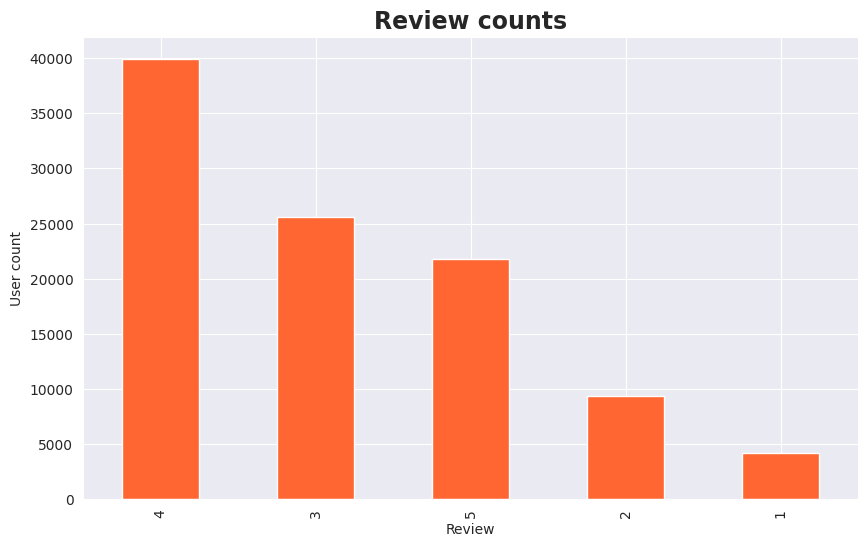

In [8]:
ratings.rating.apply(lambda x:int(np.ceil(x))).value_counts().plot.bar(figsize=(10,6),color='#FF6631')
plt.title("Review counts",fontweight='bold',fontsize=17)
plt.xlabel("Review")
plt.ylabel("User count")
plt.show()

In [9]:
ratings['timestamp'] = ratings['timestamp'].map(lambda x: datetime.fromtimestamp(x))

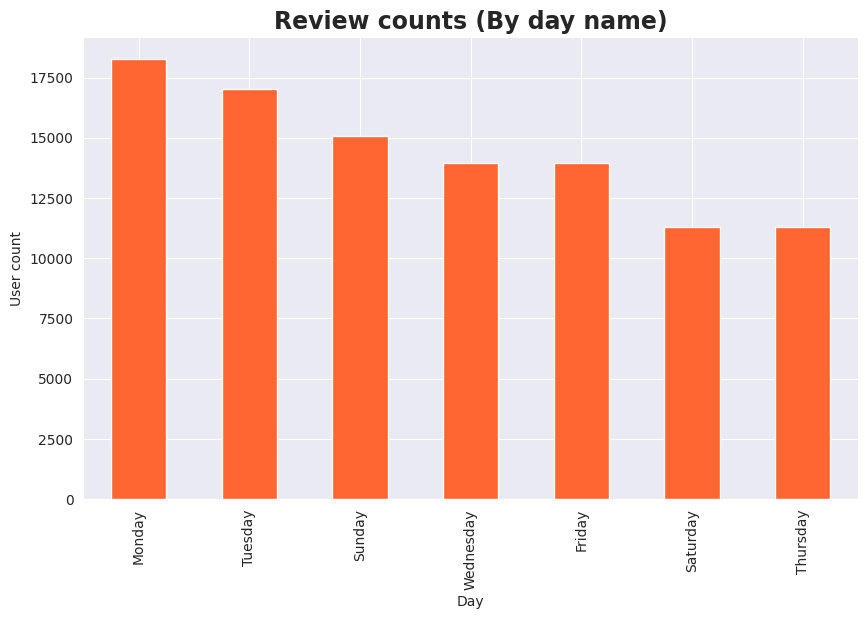

In [10]:
ratings['timestamp'].dt.day_name().value_counts().plot.bar(color='#FF6631',figsize=(10,6))
plt.title("Review counts (By day name)",fontweight='bold',fontsize=17)
plt.xlabel("Day")
plt.ylabel("User count")
plt.show()

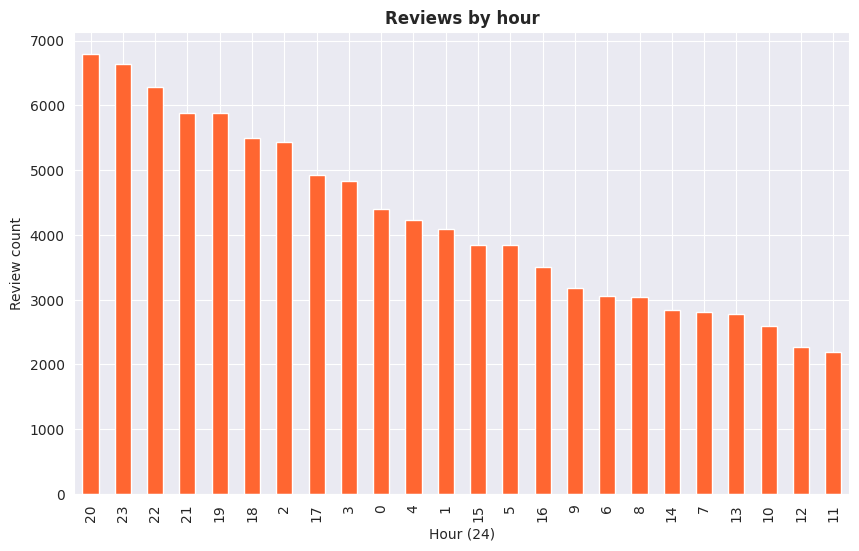

In [11]:
ratings.timestamp.dt.hour.value_counts().plot.bar(figsize=(10,6),color='#FF6631')
plt.xlabel("Hour (24)")
plt.ylabel("Review count")
plt.title("Reviews by hour",fontweight='bold')
plt.show()

In [21]:
for i, v in tqdm(ratings.groupby('movieId')):
    print(i)
    print(v)
    break

  0%|          | 0/9724 [00:00<?, ?it/s]

1
       userId  movieId  rating           timestamp
0           1        1       4 2000-07-30 20:45:03
516         5        1       4 1996-11-08 07:36:02
874         7        1       5 2005-01-25 07:52:26
1434       15        1       3 2017-11-13 13:59:30
1667       17        1       5 2011-05-18 07:28:03
...       ...      ...     ...                 ...
97364     606        1       3 2012-10-01 11:15:50
98479     607        1       4 2000-07-28 02:27:13
98666     608        1       3 2005-05-30 01:11:07
99497     609        1       3 1996-11-05 20:10:25
99534     610        1       5 2016-11-19 09:08:20

[215 rows x 4 columns]


In [16]:
def get_feature_by_user(df):
    res = list()
    for i, v in tqdm(df.groupby('userId')):
        res.append(
            (
                i,
                len(v['movieId']),
                (v['rating'] == 5).sum(),
                (v['rating'] == 4).sum(),
                (v['rating'] == 3).sum(),
                (v['rating'] == 2).sum(),
                (v['rating'] == 1).sum(),
                (v['timestamp'].dt.dayofweek == 0).sum(),
                (v['timestamp'].dt.dayofweek == 1).sum(),
                (v['timestamp'].dt.dayofweek == 2).sum(),
                (v['timestamp'].dt.dayofweek == 3).sum(),
                (v['timestamp'].dt.dayofweek == 4).sum(),
                (v['timestamp'].dt.dayofweek == 5).sum(),
                (v['timestamp'].dt.dayofweek == 6).sum(),
                (v['timestamp'].dt.hour > 17).sum()

            )
        )

    res = pd.DataFrame(
        res,
        columns=[
            'userId', 'revired_products', '5_star_ratings_gave', '4_star_ratings_gave',
            '3_star_ratings_gave', '2_star_ratings_gave', '1_star_ratings_gave',
            'monday_review_count_user', 'tuesday_review_count_user', 'wednesday_review_count_user', 'thursday_review_count_user',
            'friday_review_count_user', 'saturday_review_count_user', 'sunday_review_count_user','evening_reviews_by_user'
        ])
    return res

In [17]:
def get_feature_by_product(df):
    res = list()
    for i, v in tqdm(df.groupby('movieId')):
        res.append(
            (
                i,
                len(v['userId']),
                (v['rating'] == 5).sum(),
                (v['rating'] == 4).sum(),
                (v['rating'] == 3).sum(),
                (v['rating'] == 2).sum(),
                (v['rating'] == 1).sum(),
                (v['timestamp'].dt.dayofweek == 0).sum(),
                (v['timestamp'].dt.dayofweek == 1).sum(),
                (v['timestamp'].dt.dayofweek == 2).sum(),
                (v['timestamp'].dt.dayofweek == 3).sum(),
                (v['timestamp'].dt.dayofweek == 4).sum(),
                (v['timestamp'].dt.dayofweek == 5).sum(),
                (v['timestamp'].dt.dayofweek == 6).sum(),
                (v['timestamp'].dt.hour > 17).sum()
            )
        )

    res = pd.DataFrame(
        res,
        columns=[
            'movieId', 'user_count', '1_star_ratings_recieved', '2_star_ratings_recieved',
            '3_star_ratings_recieved', '4_star_ratings_recieved', '5_star_ratings_recieved',
            'monday_review_count_item', 'tuesday_review_count_item', 'wednesday_review_count_item', 'thursday_review_count_item',
            'friday_review_count_item', 'saturday_review_count_item', 'sunday_review_count_item','evening_reviews_by_movie'
        ])
    return res

In [19]:
start = min(ratings['timestamp'])
end = max(ratings['timestamp'])
interval = end - start

ratings['rating'] = ratings['rating'].apply(lambda x:int(np.ceil(x)))

train = ratings[ratings['timestamp'] <= (end - interval/3)]
test = ratings[ratings['timestamp'] >= (start + interval/3)]

train_y = train[train['timestamp'] >= (start + interval/3)]
train_X = train[train['timestamp'] < (start + interval/3)]
test_y = test[test['timestamp'] >= (end - interval/3)]
test_X = test[test['timestamp'] < (end - interval/3)]

train_tgt_user = set(train_X['userId']) & set(train_y['userId'])
test_tgt_user = set(test_X['userId']) & set(test_y['userId'])

f"""train_X.shape: {train_X.shape} test_X.shape: {test_X.shape}"""

'train_X.shape: (31958, 4) test_X.shape: (31833, 4)'

In [22]:
train_X_u = get_feature_by_user(train_X)
test_X_u = get_feature_by_user(test_X)

train_X_p = get_feature_by_product(train_X)
test_X_p = get_feature_by_product(test_X)

100%|██████████| 5418/5418 [00:08<00:00, 650.35it/s]


In [23]:
def get_model_input(X_u, X_m, y, tgt_users):

    merged = pd.merge(X_u, y, on=['userId'], how='inner')
    merged = pd.merge(X_m, merged, on=['movieId'], how='outer')
    merged = merged.query('userId in @tgt_users')
    # print(merged.columns)

    merged.fillna(0, inplace=True)
    features_cols = list(merged.drop(columns=['userId', 'movieId', 'rating', 'timestamp']).columns)

    query_list = merged['userId'].value_counts()

    merged = merged.set_index(['userId', 'movieId'])

    query_list = query_list.sort_index()

    merged.sort_index(inplace=True)

    df_x = merged[features_cols]

    df_y = merged['rating']

    return df_x, df_y, query_list

X_train, y_train, query_list_train = get_model_input(train_X_u, train_X_p, train_y, train_tgt_user)
X_test, y_test, query_list_test = get_model_input(test_X_u, test_X_p, test_y, test_tgt_user)

/tmp/ipykernel_55153/3142546107.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged.fillna(0, inplace=True)
/tmp/ipykernel_55153/3142546107.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged.fillna(0, inplace=True)


In [25]:
from xgboost import XGBRanker
model = XGBRanker(objective='rank:ndcg', n_estimators=100, random_state=0,learning_rate=0.1)
model.fit(
    X_train,
    y_train,
    group=query_list_train,
    eval_metric='ndcg',
    eval_set=[(X_test, y_test)],
    eval_group=[list(query_list_test)],
    verbose =10)

[0]	validation_0-ndcg:0.87948
[10]	validation_0-ndcg:0.87283


/home/amirhossein/PycharmProjects/Recommender/venv/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-ndcg:0.87537
[30]	validation_0-ndcg:0.88414
[40]	validation_0-ndcg:0.88179
[50]	validation_0-ndcg:0.88071
[60]	validation_0-ndcg:0.88119
[70]	validation_0-ndcg:0.87932
[80]	validation_0-ndcg:0.88060
[90]	validation_0-ndcg:0.87901
[99]	validation_0-ndcg:0.87902


XGBRanker(base_score=None, booster=None, callbacks=None, colsample_bylevel=None,
          colsample_bynode=None, colsample_bytree=None,
          early_stopping_rounds=None, enable_categorical=False,
          eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
          grow_policy=None, importance_type=None, interaction_constraints=None,
          learning_rate=0.1, max_bin=None, max_cat_threshold=None,
          max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
          max_leaves=None, min_child_weight=None, missing=nan,
          monotone_constraints=None, n_estimators=100, n_jobs=None,
          num_parallel_tree=None, objective='rank:ndcg', predictor=None, ...)

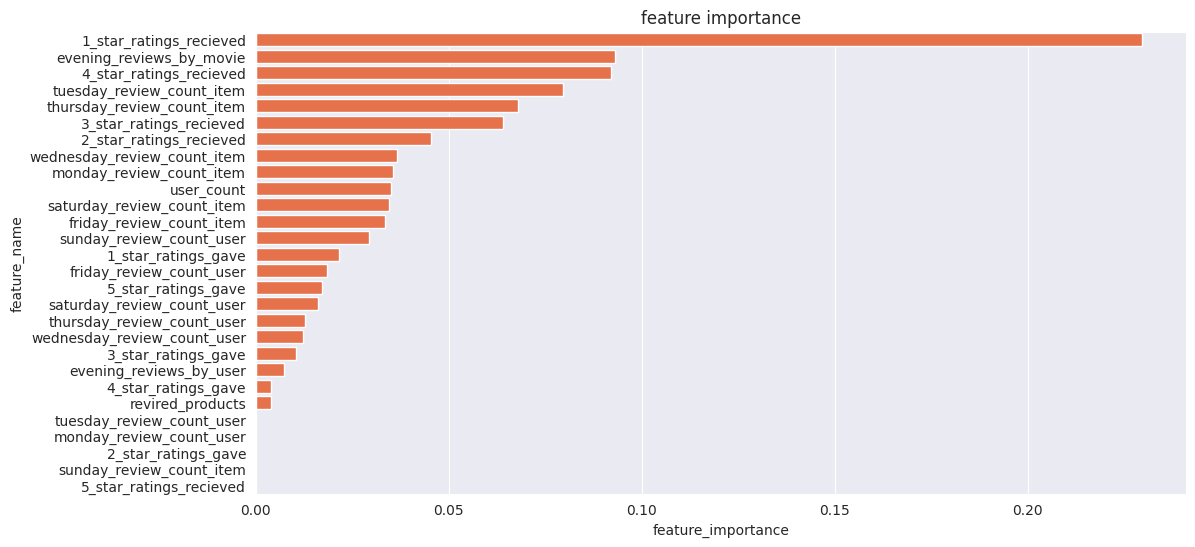

In [26]:
plt.figure(figsize=(12, 6))
df_plt = pd.DataFrame({'feature_name': X_train.columns, 'feature_importance': model.feature_importances_})
df_plt.sort_values('feature_importance', ascending=False, inplace=True)
sns.barplot(x="feature_importance", y="feature_name", data=df_plt,color='#FF6631')
plt.title('feature importance')
plt.show()

In [27]:
def predict_at_k(data, model, k):
    user_ids = list()
    product_ids = list()
    ranks = list()

    for userId, df in data.groupby('userId'):

        pred = model.predict(df.loc[userId])
        productId = np.array(df.reset_index()['movieId'])
        topK_index = np.argsort(pred)[::-1][:k]
        product_ids.extend(list(productId[topK_index]))
        user_ids.extend([userId]*len(topK_index))
        ranks.extend(list(range(1, len(topK_index)+1)))

    results = pd.DataFrame({'userId': user_ids, 'movieId': product_ids, 'rank': ranks})

    return results

predicted = predict_at_k(X_test, model, 5)

In [28]:
predicted

,userId,movieId,rank
0,15.0,4720,1
1,15.0,3535,2
2,15.0,58559,3
3,15.0,59315,4
4,15.0,1198,5
...,...,...,...
89,606.0,72998,1
90,606.0,592,2
91,606.0,1,3
92,606.0,33615,4
